# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(25043, 25043)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-25 17:03:03,liquid,coincheck,BTC/JPY,0.009,11
1,2020-03-25 17:03:38,coincheck,liquid,BTC/JPY,0.009,-3
2,2020-03-25 17:04:17,liquid,coincheck,BTC/JPY,0.009,9
3,2020-03-25 17:11:35,coincheck,liquid,BTC/JPY,0.009,-1
4,2020-03-25 17:58:47,coincheck,liquid,BTC/JPY,0.009,11
...,...,...,...,...,...,...
257,2020-03-25 23:50:20,coincheck,liquid,BTC/JPY,0.009,-3
258,2020-03-25 23:58:46,coincheck,liquid,BTC/JPY,0.009,9
259,2020-03-25 23:58:49,liquid,coincheck,BTC/JPY,0.009,1
260,2020-03-26 00:06:11,liquid,coincheck,BTC/JPY,0.009,9


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-25 17:03:03,買い,liquid,743755.0
1,2020-03-25 17:03:03,売り,coincheck,745000.0
2,2020-03-25 17:03:38,買い,coincheck,744246.0
3,2020-03-25 17:03:38,売り,liquid,743840.0
4,2020-03-25 17:04:17,買い,liquid,743474.0
...,...,...,...,...
519,2020-03-25 23:58:49,売り,coincheck,742414.0
520,2020-03-26 00:06:11,買い,liquid,740875.0
521,2020-03-26 00:06:11,売り,coincheck,741912.0
522,2020-03-26 00:06:23,買い,coincheck,741975.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
+---------------------+---------------------+
|          レコード数 |               25043 |
+---------------------+---------------------+
|            取引回数 |                 262 |
+---------------------+---------------------+
|            開始日時 | 2020-03-25 16:47:48 |
+---------------------+---------------------+
|            終了日時 | 2020-03-26 00:16:47 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 07:28:59 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                1000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   10000 |
+-------------+---------+
| 終了[JPY]   |   11390 |
+-------------+---------+
| 利益[JPY]   |    1390 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]  

## グラフ出力

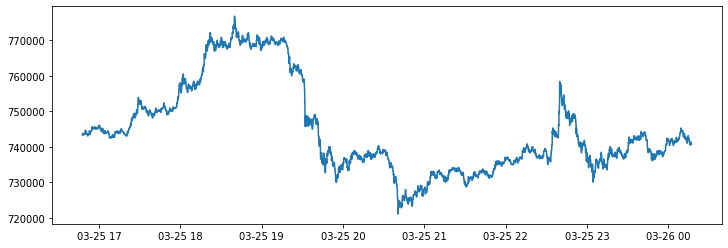

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

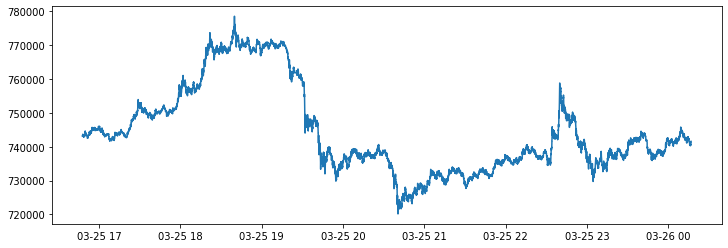

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_coincheck_sell_liquid": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_liquid_sell_coincheck": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'coincheck_bid': df_ex1.reset_index().bid,
     'liquid_ask': df_ex2.reset_index().ask,
    'liquid_bid': df_ex2.reset_index().bid,
    'coincheck_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-25 16:40:00,-751,87,743598,743512,743348,744100
2020-03-25 16:50:00,-581,-65,744642,744706,744522,745104
2020-03-25 17:00:00,-784,250,744026,743776,743619,744403
2020-03-25 17:10:00,-661,172,743886,743713,743589,744250
2020-03-25 17:20:00,-470,-150,747798,747947,747720,748191
2020-03-25 17:30:00,-590,-76,750349,750426,750210,750800
2020-03-25 17:40:00,-276,-257,750339,750596,750422,750698
2020-03-25 17:50:00,-259,-406,751485,751891,751677,751936
2020-03-25 18:00:00,-529,-298,757247,757545,757242,757770
